In [13]:
def get_data(path):
    with open(path, 'r') as file:
        data = [json.loads(line) for line in file]
    return data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from collections import defaultdict
import os

# First ones

In [45]:
def get_accuracy(arr):
    count = 0
    correct = 0
    for ans in arr:
        if ans['answer'] == ans['gold_ans_char']:
            correct += 1
        count += 1
    return (correct / count) * 100

In [46]:
llama_8b_first = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_cot_seed-5.jsonl")
llama_70b_first = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_cot_seed-5.jsonl")
olmo_7b_first = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_cot_seed-5.jsonl")                    

In [47]:
llama_8b_first[0]

{'input': 'w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1i1r1r1r1r1i0i0r1r1i0r1i1r1i1r1r1r1i0i1i0i1i0i1r1i0r1r1i1r1i1r1i0i0i1i1i1i0r1i0r1r1i1r1r1r1i0i1r1i0r1r1i0r1r1r1r1r1i1r1r1r1i1r1i0i1r1i1r1r1i0i0i1r1i1i0i1i1i1i0i1r1i0i0i1i1r1r1i1r1r1r1r1i0i1i0r1r1i1r1r1i1r1i0i0r1i1i1r1i0r1i0r1r1r1i1r1i0r1r1i0i0r1i0r1i1i1i1w1r1',
 'filename': 'datasets/flipflop/distance/s1/flipflop_500_w496.txt',
 'answer': 'w',
 'gold_ans_char': 'w',
 'full_answer': 'To print the first character from the "Input" string, I will follow these steps:\n\n1.  Write down the input string.\n2.  Identify the first character of the string.\n3.  Print the first character.\n\nInput string:\nw1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1

In [48]:
llama_8b_acc_first = get_accuracy(llama_8b_first)
llama_70b_acc_first = get_accuracy(llama_70b_first)
olmo_7b_acc_first = get_accuracy(olmo_7b_first)

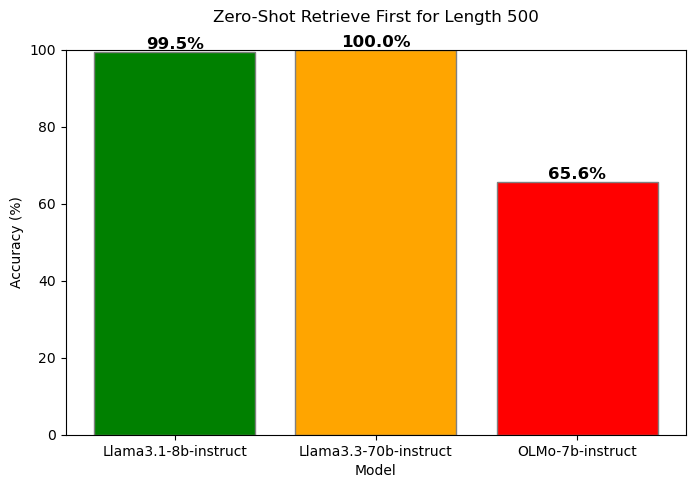

In [49]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_first,
    'Llama3.3-70b-instruct': llama_70b_acc_first,
    'OLMo-7b-instruct': olmo_7b_acc_first
}
plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Zero-Shot Retrieve First for Length 500", pad=20)
plt.ylim(0, 100)
plt.show()


In [20]:
llama_8b_first_qa = get_data("first_ones/llama3.1_8b-instruct/qa_zero-shot_chat_first_v0/500_hard_all.jsonl")
llama_70b_first_qa = get_data("first_ones/llama3.3_70b-instruct/qa_zero-shot_chat_first_v0/500_hard_all.jsonl")
olmo_7b_first_qa = get_data("first_ones/OLMo_7B-instruct/qa_zero-shot_chat_first_v0/500_hard_all.jsonl") 

llama_8b_first_qa_acc = get_accuracy(llama_8b_first_qa)
llama_70b_first_qa_acc = get_accuracy(llama_70b_first_qa)
olmo_7b_first_qa_acc = get_accuracy(olmo_7b_first_qa)

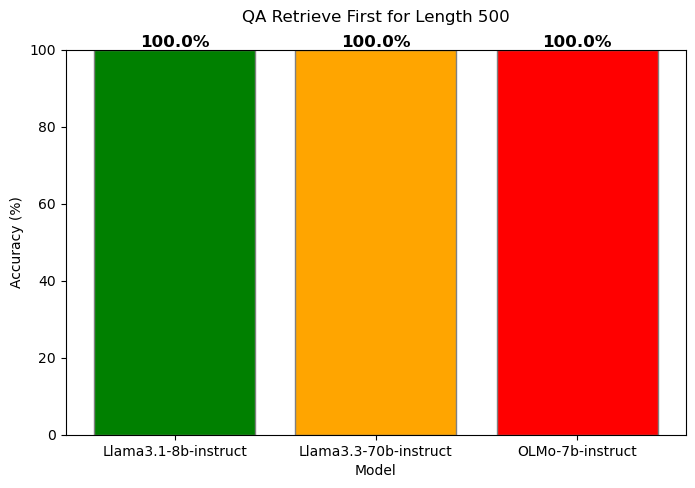

In [21]:
results = {
    'Llama3.1-8b-instruct': llama_8b_first_qa_acc,
    'Llama3.3-70b-instruct': llama_70b_first_qa_acc,
    'OLMo-7b-instruct': olmo_7b_first_qa_acc
}
plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("QA Retrieve First for Length 500", pad=20)
plt.ylim(0, 100)
plt.show()


# Last ones

In [50]:
llama_8b_last = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_cot_seed-5.jsonl")
llama_70b_last = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_cot_seed-5.jsonl")
olmo_7b_last = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_cot_seed-5.jsonl")   

llama_8b_last[0]

{'input': 'w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1i1r1r1r1r1i0i0r1r1i0r1i1r1i1r1r1r1i0i1i0i1i0i1r1i0r1r1i1r1i1r1i0i0i1i1i1i0r1i0r1r1i1r1r1r1i0i1r1i0r1r1i0r1r1r1r1r1i1r1r1r1i1r1i0i1r1i1r1r1i0i0i1r1i1i0i1i1i1i0i1r1i0i0i1i1r1r1i1r1r1r1r1i0i1i0r1r1i1r1r1i1r1i0i0r1i1i1r1i0r1i0r1r1r1i1r1i0r1r1i0i0r1i0r1i1i1i1w1r1',
 'filename': 'datasets/flipflop/distance/s1/flipflop_500_w496.txt',
 'answer': 'w',
 'gold_ans_char': '1',
 'full_answer': "To print the last character from the given string, I will follow these steps:\n\n1.  Write down the given string: \n    w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1

In [51]:
llama_8b_acc_last = get_accuracy(llama_8b_last)
llama_70b_acc_last = get_accuracy(llama_70b_last)
olmo_7b_acc_last = get_accuracy(olmo_7b_last)

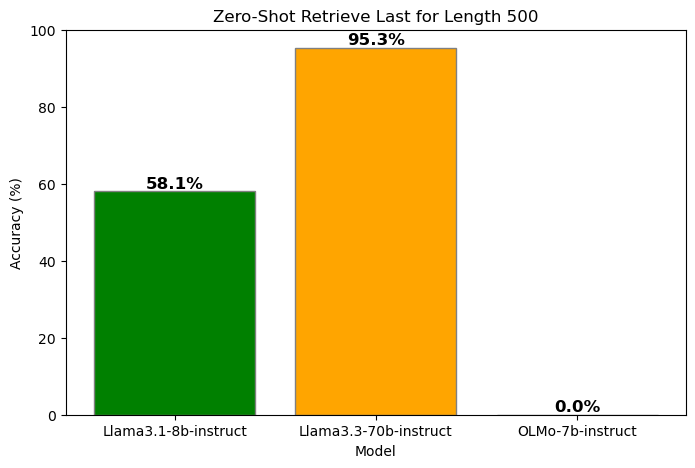

In [52]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_last,
    'Llama3.3-70b-instruct': llama_70b_acc_last,
    'OLMo-7b-instruct': olmo_7b_acc_last
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Zero-Shot Retrieve Last for Length 500")
plt.ylim(0, 100)
plt.show()


In [53]:
llama_8b_last_qa = get_data("last_ones/llama3.1_8b-instruct/qa_zero-shot_chat_last_v0/500_hard_all.jsonl")
llama_70b_last_qa = get_data("last_ones/llama3.3_70b-instruct/qa_zero-shot_chat_last_v0/500_hard_all.jsonl")
olmo_7b_last_qa = get_data("last_ones/OLMo_7B-instruct/qa_zero-shot_chat_last_v0/500_hard_all.jsonl")   


In [26]:
llama_8b_acc_last_qa = get_accuracy(llama_8b_last_qa)
llama_70b_acc_last_qa = get_accuracy(llama_70b_last_qa)
olmo_7b_acc_last_qa = get_accuracy(olmo_7b_last_qa)

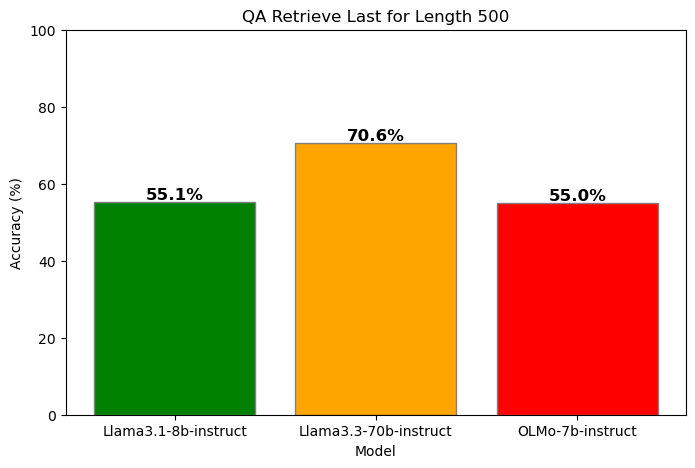

In [27]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_last_qa,
    'Llama3.3-70b-instruct': llama_70b_acc_last_qa,
    'OLMo-7b-instruct': olmo_7b_acc_last_qa
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("QA Retrieve Last for Length 500")
plt.ylim(0, 100)
plt.show()


# Induction Head

In [28]:
def flatten(xss):
    return [x for xs in xss for x in xs]

def get_ind_acc(arr):
    correct = 0
    for ans in arr:
        if str(ans['answer']) == str(ans['last_valid_token']):
            correct += 1
    return (correct / len(arr)) * 100

In [29]:
llama_8b_ind = flatten([
    get_data("flipflop/llama3.1_8B-instruct/distance/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance/s5/flipflop_500_w496_results.jsonl")
])

llama_70b_ind = flatten([
    get_data("flipflop/llama3.3_70B-instruct/distance/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance/s5/flipflop_500_w496_results.jsonl")
])

olmo_7b_ind = flatten([
    get_data("flipflop/OLMo_7b-instruct/distance/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance/s5/flipflop_500_w496_results.jsonl")
])

In [30]:
llama_8b_ind[0]

{'id': 0,
 'prompt': 'w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1i1r1r1r1r1i0i0r1r1i0r1i1r1i1r1r1r1i0i1i0i1i0i1r1i0r1r1i1r1i1r1i0i0i1i1i1i0r1i0r1r1i1r1r1r1i0i1r1i0r1r1i0r1r1r1r1r1i1r1r1r1i1r1i0i1r1i1r1r1i0i0i1r1i1i0i1i1i1i0i1r1i0i0i1i1r1r1i1r1r1r1r1i0i1i0r1r1i1r1r1i1r1i0i0r1i1i1r1i0r1i0r1r1r1i1r1i0r1r1i0i0r1i0r1i1i1i1w1r',
 'answer': '" + find_digit_after_w(input_str) + "',
 'flipflop': 'w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1i1r1r1r1r1i0i0r1r1i0r1i1r1i1r1r1r1i0i1i0i1i0i1r1i0r1r1i1r1i1r1i0i0i1i1i1i0r1i0r1r1i1r1r1r1i0i1r1i0r1r1i0r1r1r1r1r1i1r1r1r1i1r1i0i1r1i1r1r1i0i0i1r1i1i0i1i1i1i0i1r1i0i0i1

In [31]:
llama_8b_acc_ind = get_ind_acc(llama_8b_ind)
llama_70b_acc_ind = get_ind_acc(llama_70b_ind)
olmo_7b_acc_ind = get_ind_acc(olmo_7b_ind)

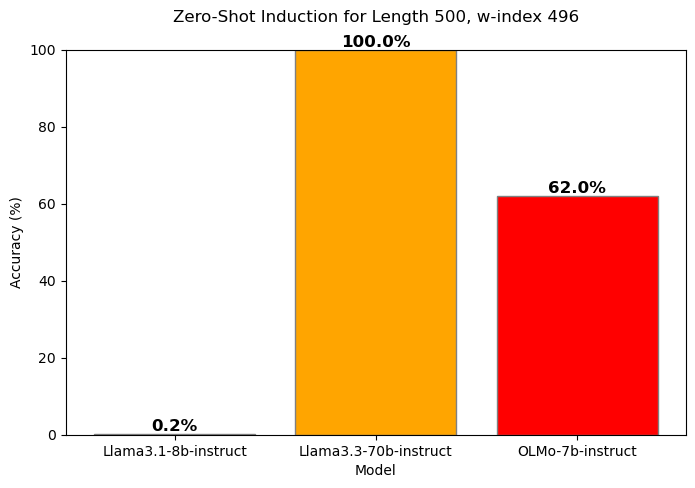

In [32]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_ind,
    'Llama3.3-70b-instruct': llama_70b_acc_ind,
    'OLMo-7b-instruct': olmo_7b_acc_ind
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Zero-Shot Induction for Length 500, w-index 496", pad=20)
plt.ylim(0, 100)
plt.show()


In [33]:
llama_8b_ind_qa = flatten([
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s5/flipflop_500_w496_results.jsonl")
])

llama_70b_ind = flatten([
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s5/flipflop_500_w496_results.jsonl")
])

olmo_7b_ind = flatten([
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s5/flipflop_500_w496_results.jsonl")
])

llama_8b_acc_ind_qa = get_ind_acc(llama_8b_ind)
llama_70b_acc_ind_qa = get_ind_acc(llama_70b_ind)
olmo_7b_acc_ind_qa = get_ind_acc(olmo_7b_ind)

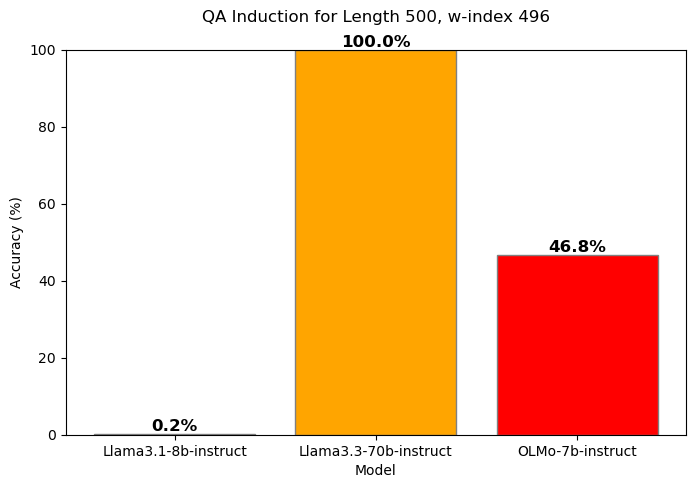

In [34]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_ind_qa,
    'Llama3.3-70b-instruct': llama_70b_acc_ind_qa,
    'OLMo-7b-instruct': olmo_7b_acc_ind_qa
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("QA Induction for Length 500, w-index 496", pad=20)
plt.ylim(0, 100)
plt.show()


# Flip-Flop

In [35]:
llama_8b_flipflop = flatten([
    get_data("flipflop/llama3.1_8B-instruct/sparse/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse/s5/flipflop_500_pw0_results.jsonl")
])

llama_70b_flipflop = flatten([
    get_data("flipflop/llama3.3_70B-instruct/sparse/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse/s5/flipflop_500_pw0_results.jsonl")
])

olmo_7b_flipflop = flatten([
    get_data("flipflop/OLMo_7b-instruct/sparse/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse/s5/flipflop_500_pw0_results.jsonl")
])

In [36]:
llama_8b_acc_flipflop = get_ind_acc(llama_8b_flipflop)
llama_70b_acc_flipflop = get_ind_acc(llama_70b_flipflop)
olmo_7b_acc_flipflop = get_ind_acc(olmo_7b_flipflop)

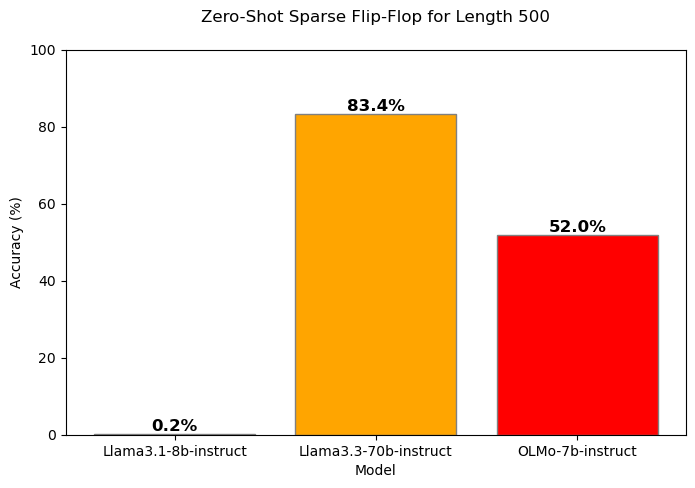

In [37]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_flipflop,
    'Llama3.3-70b-instruct': llama_70b_acc_flipflop,
    'OLMo-7b-instruct': olmo_7b_acc_flipflop
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Zero-Shot Sparse Flip-Flop for Length 500", pad=20)
plt.ylim(0, 100)
plt.show()


In [38]:
llama_8b_flipflop_qa = flatten([
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s5/flipflop_500_pw0_results.jsonl")
])

llama_70b_flipflop_qa = flatten([
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s5/flipflop_500_pw0_results.jsonl")
])

olmo_7b_flipflop_qa = flatten([
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s5/flipflop_500_pw0_results.jsonl")
])

llama_8b_acc_flipflop_qa = get_ind_acc(llama_8b_flipflop_qa)
llama_70b_acc_flipflop_qa = get_ind_acc(llama_70b_flipflop_qa)
olmo_7b_acc_flipflop_qa = get_ind_acc(olmo_7b_flipflop_qa)

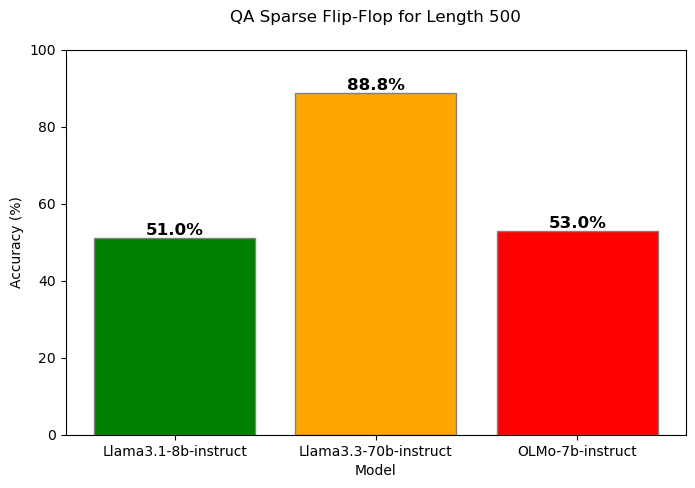

In [39]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_flipflop_qa,
    'Llama3.3-70b-instruct': llama_70b_acc_flipflop_qa,
    'OLMo-7b-instruct': olmo_7b_acc_flipflop_qa
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("QA Sparse Flip-Flop for Length 500", pad=20)
plt.ylim(0, 100)
plt.show()


# Plot all together

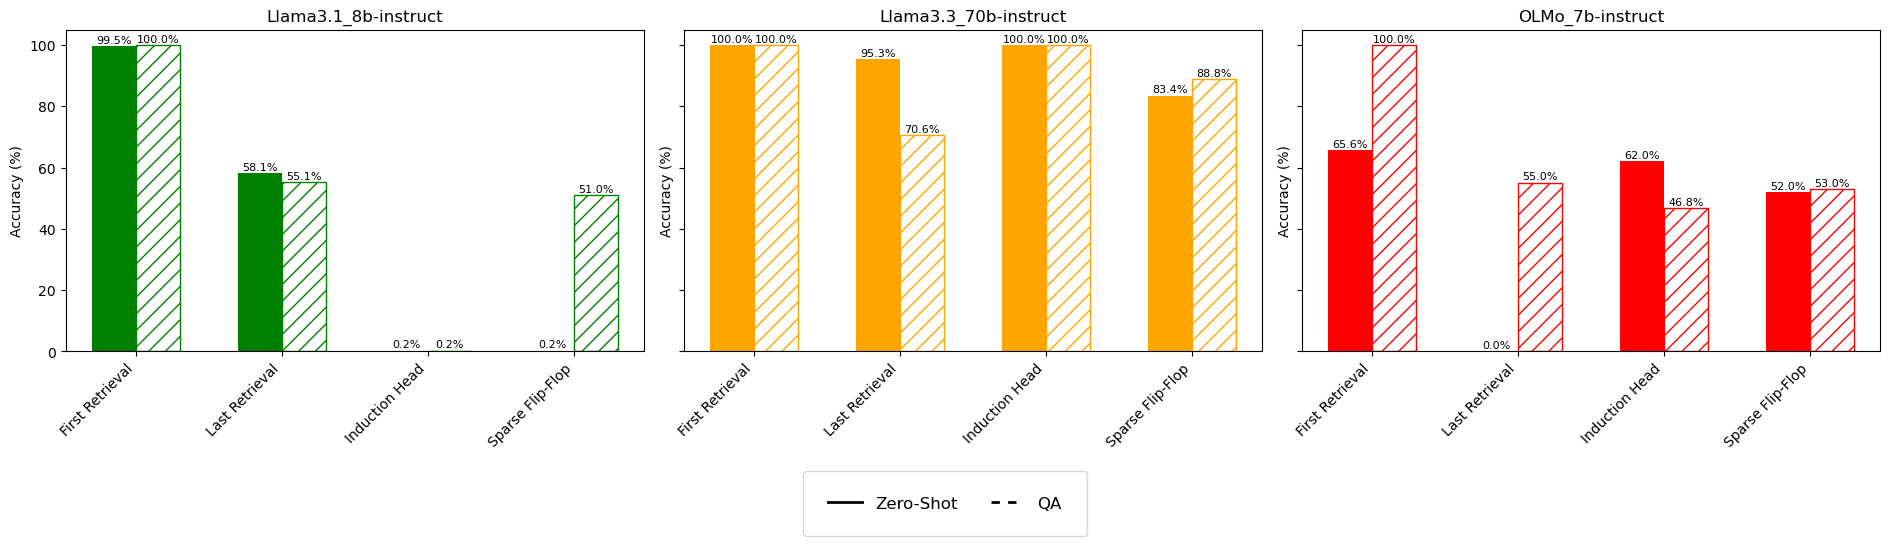

In [54]:
data = {
    'Llama3.1_8b-instruct':
    {
        'First Retrieval': {
            'Zero-Shot': llama_8b_acc_first,
            'QA': llama_8b_first_qa_acc
        },
        'Last Retrieval': {
            'Zero-Shot': llama_8b_acc_last,
            'QA': llama_8b_acc_last_qa
        },
        'Induction Head': {
            'Zero-Shot': llama_8b_acc_ind,
            'QA': llama_8b_acc_ind_qa
        },
        'Sparse Flip-Flop': {
            'Zero-Shot': llama_8b_acc_flipflop,
            'QA': llama_8b_acc_flipflop_qa
        },
    },
    'Llama3.3_70b-instruct':
    {
        'First Retrieval': {
            'Zero-Shot': llama_70b_acc_first,
            'QA': llama_70b_first_qa_acc
        },
        'Last Retrieval': {
            'Zero-Shot': llama_70b_acc_last,
            'QA': llama_70b_acc_last_qa
        },
        'Induction Head': {
            'Zero-Shot': llama_70b_acc_ind,
            'QA': llama_70b_acc_ind_qa
        },
        'Sparse Flip-Flop': {
            'Zero-Shot': llama_70b_acc_flipflop,
            'QA': llama_70b_acc_flipflop_qa
        }
    },
    'OLMo_7b-instruct':
    {
        'First Retrieval': {
            'Zero-Shot': olmo_7b_acc_first,
            'QA': olmo_7b_first_qa_acc
        },
        'Last Retrieval': {
            'Zero-Shot': olmo_7b_acc_last,
            'QA': olmo_7b_acc_last_qa
        },
        'Induction Head': {
            'Zero-Shot': olmo_7b_acc_ind,
            'QA': olmo_7b_acc_ind_qa
        },
        'Sparse Flip-Flop': {
            'Zero-Shot': olmo_7b_acc_flipflop,
            'QA': olmo_7b_acc_flipflop_qa
        }
    }
}

models = list(data.keys())
tasks = list(data[models[0]].keys())
variations = ['Zero-Shot', 'QA']
colors = {'Llama3.1_8b-instruct': 'green', 'Llama3.3_70b-instruct': 'orange', 'OLMo_7b-instruct': 'red'}

fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True)
bar_width = 0.3

for i, (model, ax) in enumerate(zip(models, axes)):
    x = np.arange(len(tasks))
    main_values = [data[model][task]['Zero-Shot'] for task in tasks]
    alt_values = [data[model][task]['QA'] for task in tasks]
    
    ax.bar(x - bar_width/2, main_values, bar_width, color=colors[model], label='Zero-Shot')
    ax.bar(x + bar_width/2, alt_values, bar_width, hatch='//', edgecolor=colors[model], facecolor='none', label='QA')
    
    ax.set_xticks(x)
    ax.set_xticklabels(tasks, rotation=45, ha='right')
    ax.set_title(model)
    ax.set_ylabel('Accuracy (%)')
    
    for j in range(len(tasks)):
        ax.text(x[j] - bar_width/2, main_values[j] + 1, f'{main_values[j]:.1f}%', ha='center', fontsize=8)
        ax.text(x[j] + bar_width/2, alt_values[j] + 1, f'{alt_values[j]:.1f}%', ha='center', fontsize=8)

legend_handles = [
    plt.Line2D([0], [0], color='black', lw=2, label='Zero-Shot'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle=(0, (3, 3)), label='QA')
]
fig.legend(handles=legend_handles, loc='lower center', ncol=2, fontsize=12, borderpad=1.5, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.savefig("model_wise_results.png",  dpi=300, bbox_inches='tight')
plt.show()

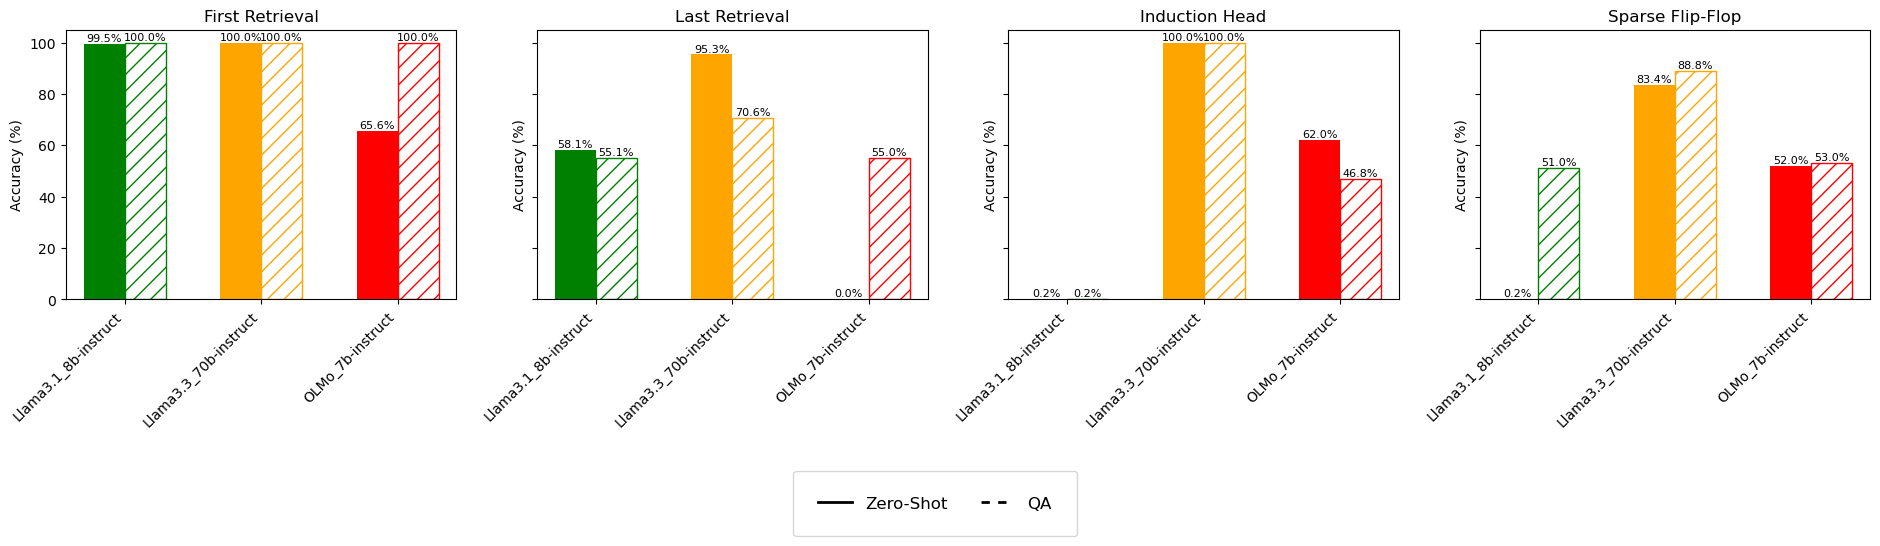

In [55]:
fig, axes = plt.subplots(1, len(tasks), figsize=(19, 5), sharey=True)
bar_width = 0.3

for i, (task, ax) in enumerate(zip(tasks, axes)):
    x = np.arange(len(models))
    
    main_values = [data[model][task]['Zero-Shot'] for model in models]
    alt_values = [data[model][task]['QA'] for model in models]
    
    ax.bar(x - bar_width/2, main_values, bar_width, color=[colors[model] for model in models], label='Zero-Shot')
    ax.bar(x + bar_width/2, alt_values, bar_width, hatch='//', edgecolor=[colors[model] for model in models], facecolor='none', label='QA')
    
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_title(task)
    ax.set_ylabel('Accuracy (%)')
    
    for j in range(len(models)):
        ax.text(x[j] - bar_width/2, main_values[j] + 1, f'{main_values[j]:.1f}%', ha='center', fontsize=8)
        ax.text(x[j] + bar_width/2, alt_values[j] + 1, f'{alt_values[j]:.1f}%', ha='center', fontsize=8)
    
legend_handles = [
    plt.Line2D([0], [0], color='black', lw=2, label='Zero-Shot'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle=(0, (3, 3)), label='QA')
]
fig.legend(handles=legend_handles, loc='lower center', ncol=2, fontsize=12, borderpad=1.5, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("task_wise_results.png", dpi=300, bbox_inches='tight')
plt.show()
